In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('titanic_train.csv')

In [3]:
df

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df.describe()

,Unnamed: 0,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,445.000000,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,222.500000,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,445.000000,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,667.500000,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,890.000000,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df.isna().sum()

Unnamed: 0       0
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
df.dtypes

Unnamed: 0       int64
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [7]:
df = df.drop(columns=['Name','Ticket','Cabin','Embarked'])

df

,Unnamed: 0,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,1,0,3,male,22.0,1,0,7.2500
1,1,2,1,1,female,38.0,1,0,71.2833
2,2,3,1,3,female,26.0,0,0,7.9250
3,3,4,1,1,female,35.0,1,0,53.1000
4,4,5,0,3,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...,...
886,886,887,0,2,male,27.0,0,0,13.0000
887,887,888,1,1,female,19.0,0,0,30.0000
888,888,889,0,3,female,NaN,1,2,23.4500
889,889,890,1,1,male,26.0,0,0,30.0000


In [8]:
from sklearn.preprocessing import OrdinalEncoder

In [9]:
ord_encoder = OrdinalEncoder(categories=[['male','female']])

df1 = ord_encoder.fit_transform(df[['Sex']])



In [10]:
df['Sex'] = df1

df

,Unnamed: 0,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,1,0,3,0.0,22.0,1,0,7.2500
1,1,2,1,1,1.0,38.0,1,0,71.2833
2,2,3,1,3,1.0,26.0,0,0,7.9250
3,3,4,1,1,1.0,35.0,1,0,53.1000
4,4,5,0,3,0.0,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...,...
886,886,887,0,2,0.0,27.0,0,0,13.0000
887,887,888,1,1,1.0,19.0,0,0,30.0000
888,888,889,0,3,1.0,NaN,1,2,23.4500
889,889,890,1,1,0.0,26.0,0,0,30.0000


In [11]:
df.isna().sum()

Unnamed: 0       0
PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
dtype: int64

In [12]:
df['Age'] = df['Age'].fillna(df['Age'].mode()[0])

In [13]:
df.isna().sum()

Unnamed: 0     0
PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
dtype: int64

In [14]:
df = df.drop(columns=['Unnamed: 0'])

df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,0.0,22.0,1,0,7.2500
1,2,1,1,1.0,38.0,1,0,71.2833
2,3,1,3,1.0,26.0,0,0,7.9250
3,4,1,1,1.0,35.0,1,0,53.1000
4,5,0,3,0.0,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...
886,887,0,2,0.0,27.0,0,0,13.0000
887,888,1,1,1.0,19.0,0,0,30.0000
888,889,0,3,1.0,24.0,1,2,23.4500
889,890,1,1,0.0,26.0,0,0,30.0000


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

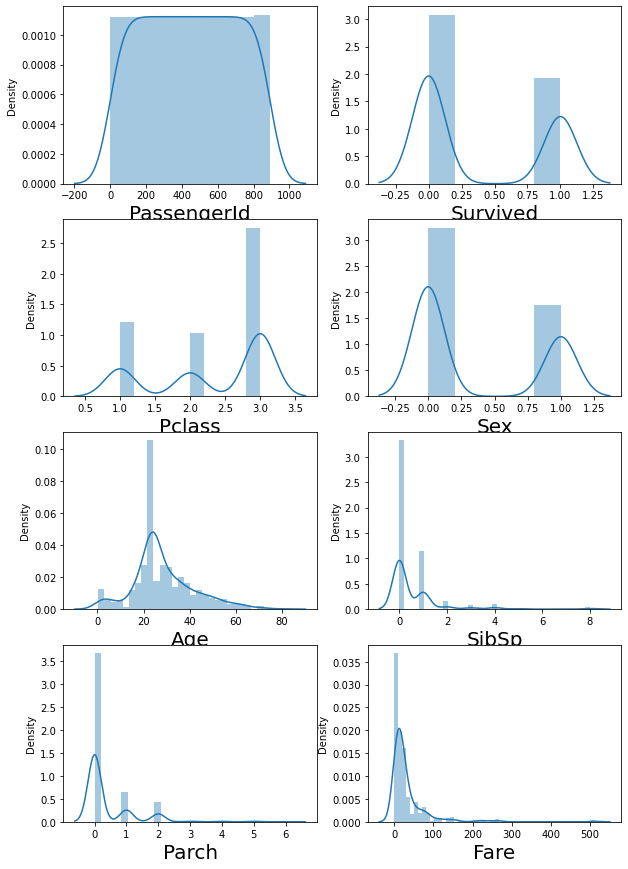

In [16]:
plt.figure(figsize=(10,15))
plotnumber = 1

for column in df:
    if plotnumber<=8:
        ax = plt.subplot(4,2,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
    
plt.show()

In [17]:
q1 = df.quantile(0.25)

q3 = df.quantile(0.75)

iqr = q3 - q1

In [18]:
print(q1)



print(q3)



print(iqr)

PassengerId    223.5000
Survived         0.0000
Pclass           2.0000
Sex              0.0000
Age             22.0000
SibSp            0.0000
Parch            0.0000
Fare             7.9104
Name: 0.25, dtype: float64
PassengerId    668.5
Survived         1.0
Pclass           3.0
Sex              1.0
Age             35.0
SibSp            1.0
Parch            0.0
Fare            31.0
Name: 0.75, dtype: float64
PassengerId    445.0000
Survived         1.0000
Pclass           1.0000
Sex              1.0000
Age             13.0000
SibSp            1.0000
Parch            0.0000
Fare            23.0896
dtype: float64


In [19]:
pass_high = (q3.PassengerId + (1.5 * iqr.PassengerId))

pass_high

1336.0

In [20]:
index= np.where(df['PassengerId'] > pass_high)

index

(array([], dtype=int64),)

In [21]:
age_high = (q3.Age + (1.5 * iqr.Age))

age_high

54.5

In [22]:
fare_high = (q3.Fare + (1.5 * iqr.Fare))

fare_high

65.6344

In [23]:
index = np.where(df['Fare'] > fare_high)

index


df = df.drop(df.index[index])

df.reset_index

<bound method DataFrame.reset_index of      PassengerId  Survived  Pclass  Sex   Age  SibSp  Parch     Fare
0              1         0       3  0.0  22.0      1      0   7.2500
2              3         1       3  1.0  26.0      0      0   7.9250
3              4         1       1  1.0  35.0      1      0  53.1000
4              5         0       3  0.0  35.0      0      0   8.0500
5              6         0       3  0.0  24.0      0      0   8.4583
..           ...       ...     ...  ...   ...    ...    ...      ...
886          887         0       2  0.0  27.0      0      0  13.0000
887          888         1       1  1.0  19.0      0      0  30.0000
888          889         0       3  1.0  24.0      1      2  23.4500
889          890         1       1  0.0  26.0      0      0  30.0000
890          891         0       3  0.0  32.0      0      0   7.7500

[775 rows x 8 columns]>

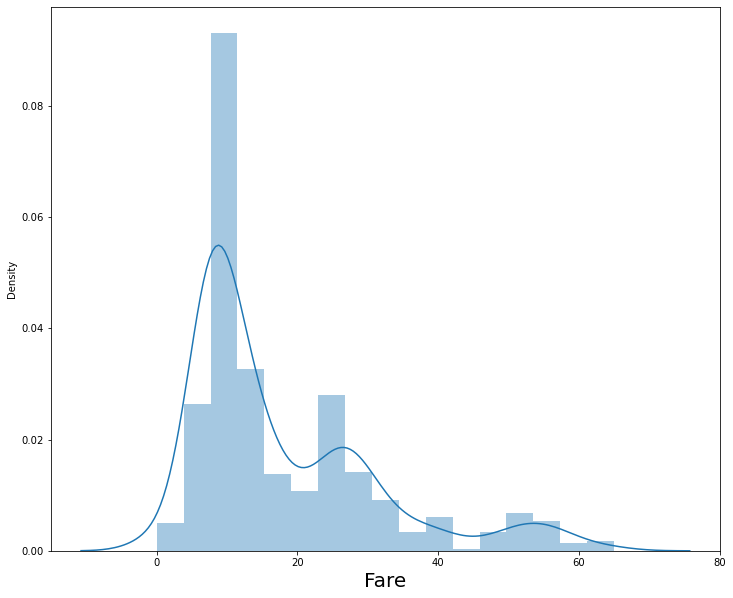

In [24]:
plt.figure(figsize=(12,10))

sns.distplot(df['Fare'])
plt.xlabel(column,fontsize=20)

plt.show()


In [25]:
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split

from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score

In [26]:
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,0.0,22.0,1,0,7.2500
2,3,1,3,1.0,26.0,0,0,7.9250
3,4,1,1,1.0,35.0,1,0,53.1000
4,5,0,3,0.0,35.0,0,0,8.0500
5,6,0,3,0.0,24.0,0,0,8.4583
...,...,...,...,...,...,...,...,...
886,887,0,2,0.0,27.0,0,0,13.0000
887,888,1,1,1.0,19.0,0,0,30.0000
888,889,0,3,1.0,24.0,1,2,23.4500
889,890,1,1,0.0,26.0,0,0,30.0000


In [27]:
x = df.drop(columns=['Survived'])

y = df['Survived']

In [28]:
scaler = StandardScaler()

x_scaled = scaler.fit_transform(x)

In [29]:
vif = pd.DataFrame()
vif['vif'] = [variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]
vif['features'] = x.columns

vif

,vif,features
0,1.012133,PassengerId
1,2.170834,Pclass
2,1.106105,Sex
3,1.277219,Age
4,1.605364,SibSp
5,1.445842,Parch
6,2.467527,Fare


In [30]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.25,random_state=42)

In [31]:
log_reg = LogisticRegression()

log_reg.fit(x_train,y_train)

LogisticRegression()

In [32]:
x_test_pred = log_reg.predict(x_test)

x_test_pred

array([0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0], dtype=int64)

In [33]:
accuracy = accuracy_score(y_test,x_test_pred)

accuracy

0.7731958762886598

In [34]:
conf_mat = confusion_matrix(y_test,x_test_pred)

conf_mat

array([[109,  18],
       [ 26,  41]], dtype=int64)

In [35]:
(109+41)/(109+18+26+41)

0.7731958762886598

In [36]:
from sklearn.metrics import classification_report

In [37]:
print(classification_report(y_test,x_test_pred))

              precision    recall  f1-score   support

           0       0.81      0.86      0.83       127
           1       0.69      0.61      0.65        67

    accuracy                           0.77       194
   macro avg       0.75      0.74      0.74       194
weighted avg       0.77      0.77      0.77       194



In [38]:
fpr,tpr,threshold = roc_curve(y_test,x_test_pred)

In [39]:
print('Threshold =',threshold)

print('True Positive Rate =',tpr)

print('False Positive Rate =',fpr)

Threshold = [2 1 0]
True Positive Rate = [0.        0.6119403 1.       ]
False Positive Rate = [0.         0.14173228 1.        ]


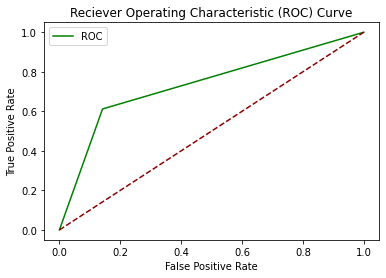

In [40]:
plt.plot(fpr,tpr,color='green',label='ROC')
plt.plot([0,1],[0,1],color='darkred',linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Reciever Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [41]:
auc_score = roc_auc_score(y_test,x_test_pred)

auc_score

0.7351040075214479

In [42]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [43]:
def metric_score(clf,x_train,x_test,y_train,y_test, train=True):
    if train:
        y_pred = clf.predict(x_train)
        
        print('\n===============Train Result===============')
        
        print(f'Accuracy Score: {accuracy_score(y_train,y_pred) * 100:.2f}%')
        
        
    elif train==False:
        pred = clf.predict(x_test)
        
        print('\n===============Test Result================')
        print(f'Accuracy Score: {accuracy_score(y_test,pred) * 100:.2f}%')
        
        print('\n \n Test Classification Report \n',classification_report(y_test,pred,digits = 2))
        

In [44]:
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [45]:
metric_score(clf,x_train,x_test,y_train,y_test,train=True)

metric_score(clf,x_train,x_test,y_train,y_test,train=False)


===============Train Result===============
Accuracy Score: 100.00%

===============Test Result================
Accuracy Score: 75.77%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.81      0.82      0.82       127
           1       0.65      0.64      0.65        67

    accuracy                           0.76       194
   macro avg       0.73      0.73      0.73       194
weighted avg       0.76      0.76      0.76       194



In [46]:
grid_param = {'criterion':['ginni','entropy'],
              'max_depth': range(5,10),
              'min_samples_leaf': range(2,6),
              'min_samples_split': range(3,8),
              'max_leaf_nodes': range(5,10)}

In [47]:
grid_search = GridSearchCV(estimator=clf,
                          param_grid=grid_param,
                          cv=5,
                          n_jobs=-1)

In [48]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['ginni', 'entropy'],
                         'max_depth': range(5, 10),
                         'max_leaf_nodes': range(5, 10),
                         'min_samples_leaf': range(2, 6),
                         'min_samples_split': range(3, 8)})

In [49]:
best_parameters = grid_search.best_params_

print(best_parameters)

{'criterion': 'entropy', 'max_depth': 5, 'max_leaf_nodes': 8, 'min_samples_leaf': 2, 'min_samples_split': 3}


In [50]:
clf = DecisionTreeClassifier(criterion = 'entropy',min_samples_split = 3,max_depth = 5,min_samples_leaf = 2)

clf.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=2,
                       min_samples_split=3)

In [51]:
metric_score(clf,x_train,x_test,y_train,y_test,train=True)

metric_score(clf,x_train,x_test,y_train,y_test,train=False)


===============Train Result===============
Accuracy Score: 85.89%

===============Test Result================
Accuracy Score: 79.90%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.84      0.86      0.85       127
           1       0.72      0.69      0.70        67

    accuracy                           0.80       194
   macro avg       0.78      0.77      0.78       194
weighted avg       0.80      0.80      0.80       194

